In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
%matplotlib inline
#%matplotlib widget


In [4]:
from sample_3d_view import sample_sphere, sample_torus, visualize_grid_sphere, visualize_grid_torus, sample_ellipsoid

In [5]:
from local_pca_utils import make_nearest_neighbors_graph, make_tangents

from curvature_utils import make_tangents_and_normals, get_second_fundamental_form

from tensorlaplacian_utils import get_riemannian_ricci_scalar, get_weitzenbock_operator, get_eigvals_of_weitzenbock

In [6]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as font_manager
from mpl_toolkits.mplot3d import axes3d

mpl.rcParams['font.family']='serif'
cmfont = font_manager.FontProperties(fname=mpl.get_data_path() + '/fonts/ttf/cmr10.ttf')
mpl.rcParams['font.serif']=cmfont.get_name()
mpl.rcParams['mathtext.fontset']='cm'
mpl.rcParams['axes.unicode_minus']=False
mpl.rcParams['figure.dpi'] = 300
plt.rcParams["figure.figsize"] = (6,6)
plt.rcParams.update({'font.size': 24})

In [7]:
import itertools

from absl import logging

import numpy as np
import scipy
import scipy.sparse
import scipy.sparse.linalg

from tqdm import tqdm

In [8]:
def genus_two(**kwargs):
    def solve_for_z(x, y):
        x, y = map(lambda x: np.array(x).astype('complex'), [x, y])
        return np.sqrt(
            0.01 - ((x**2 + y**2) ** 2 - .75*x**2 + .75*y**2)**2
        )
    aa = np.linspace(-1, 1, 200)
    xx, yy = np.meshgrid(aa, aa)
    xx = xx.flatten()
    yy = yy.flatten()
    zz = solve_for_z(xx, yy)
    ix_on_surface = np.isreal(zz)

    data_pos = np.vstack([
        xx[ix_on_surface],
        yy[ix_on_surface],
        np.real(zz[ix_on_surface]),
    ]).T

    data_neg = np.vstack([
        xx[ix_on_surface],
        yy[ix_on_surface],
        -np.real(zz[ix_on_surface]),
    ]).T
    data = np.vstack([data_pos, data_neg])
    #chosen_ix = choose_n_farthest_points(data, 1500, 42)
    data_orig = data[:]
    return data_orig

In [14]:
data = genus_two()
data*=10
graph = make_nearest_neighbors_graph(data, 20, n=21880)

100%|██████████| 21880/21880 [00:02<00:00, 8009.28it/s]


In [28]:
#data = sample_torus(npoints,2,1)
npoints = 10000
data = sample_sphere(npoints)
graph = make_nearest_neighbors_graph(data, 10, n=npoints)

100%|██████████| 10000/10000 [00:00<00:00, 13554.70it/s]


In [70]:
npoints = 20000
data = sample_ellipsoid(npoints,4,2,2)
graph = make_nearest_neighbors_graph(data, 40, n=npoints)

100%|██████████| 20000/20000 [00:05<00:00, 3714.22it/s]


In [88]:
npoints = 20000
data = sample_torus(npoints,2,1)
graph = make_nearest_neighbors_graph(data, 20, n=npoints)

100%|██████████| 20000/20000 [00:02<00:00, 7295.71it/s]


In [107]:
data = np.loadtxt('dragon.txt')
data = data[:, [0, 2, 1]]
data *= 10
np.random.shuffle(data)
npoints = data.shape[0]
graph = make_nearest_neighbors_graph(data, 20, n=22998)

100%|██████████| 22998/22998 [00:02<00:00, 7826.70it/s]


In [165]:
data = np.loadtxt('dragon2.txt')
data = data[:, [0, 2, 1]]
data *= 10
np.random.shuffle(data)
npoints = data.shape[0]
graph = make_nearest_neighbors_graph(data, 60, n=22998)

100%|██████████| 22998/22998 [00:02<00:00, 7785.21it/s]


In [152]:
data = np.loadtxt('vase.txt')
data *= 10
npoints = data.shape[0]
graph = make_nearest_neighbors_graph(data, 60, n=10692)

In [154]:
data = np.loadtxt('vase2.txt')
data *= 10
npoints = data.shape[0]
graph = make_nearest_neighbors_graph(data, 60, n=36022)

100%|██████████| 36022/36022 [00:12<00:00, 2817.64it/s]


In [176]:
data = np.loadtxt('bunny2.txt')
#data = data[:, [0, 2, 1]]
data *= 10
np.random.shuffle(data)
npoints = data.shape[0]
graph = make_nearest_neighbors_graph(data, 60, n=35947)

100%|██████████| 35947/35947 [00:13<00:00, 2660.58it/s]


In [15]:
tangents, normals, local_coords, h_total, true_h = get_second_fundamental_form(data, graph, 2)
riem, ric, sc = get_riemannian_ricci_scalar(true_h)

100%|██████████| 21880/21880 [00:05<00:00, 3931.26it/s]


In [16]:
max(sc), min(sc)

(0.14630161573871525, -4.123122517302136)

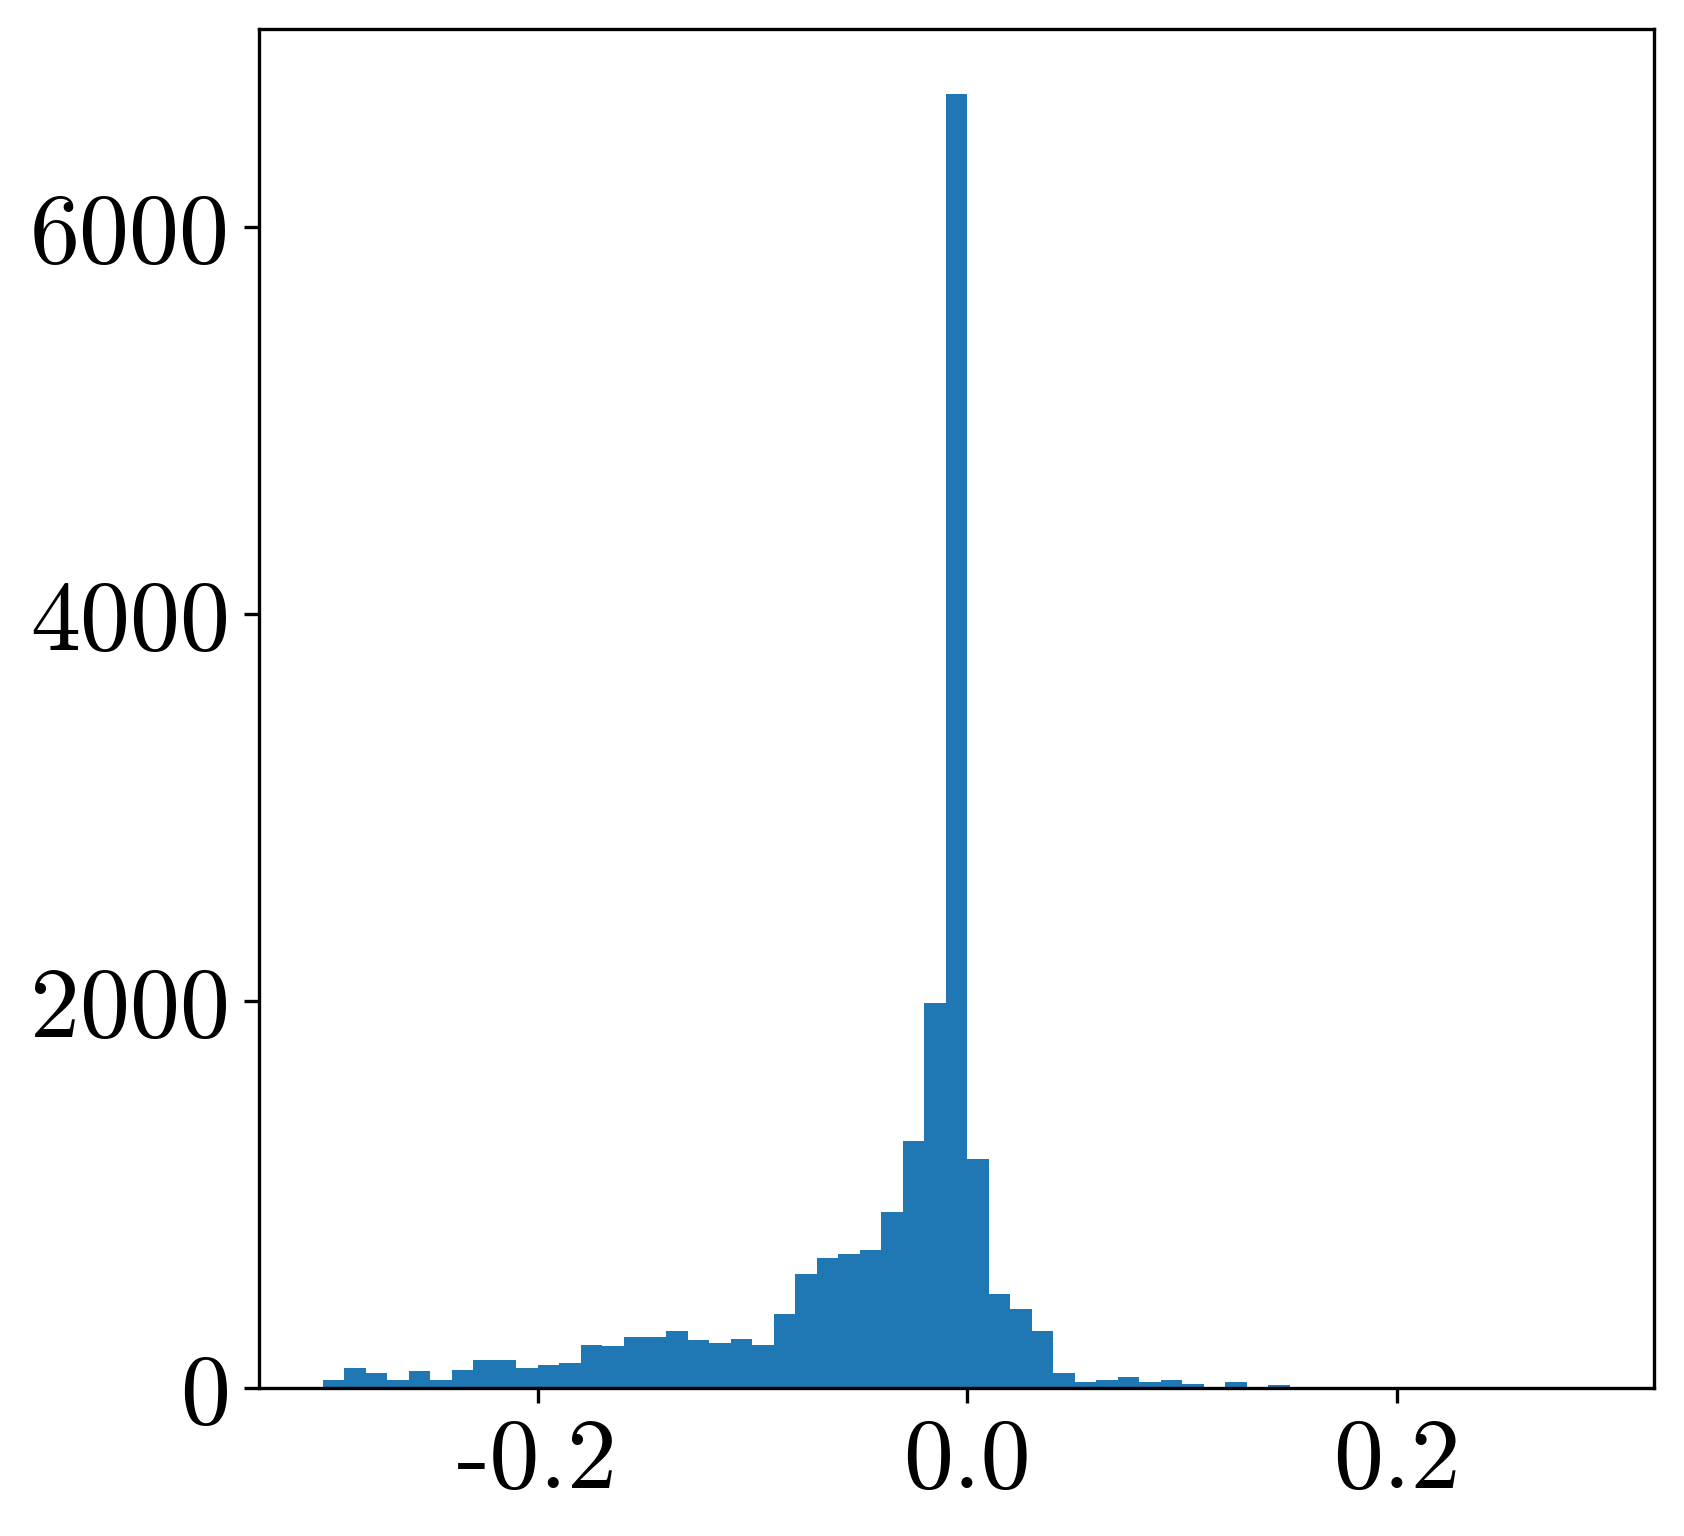

In [21]:
plt.hist(sc, bins = np.arange(-0.3,0.3, .01));

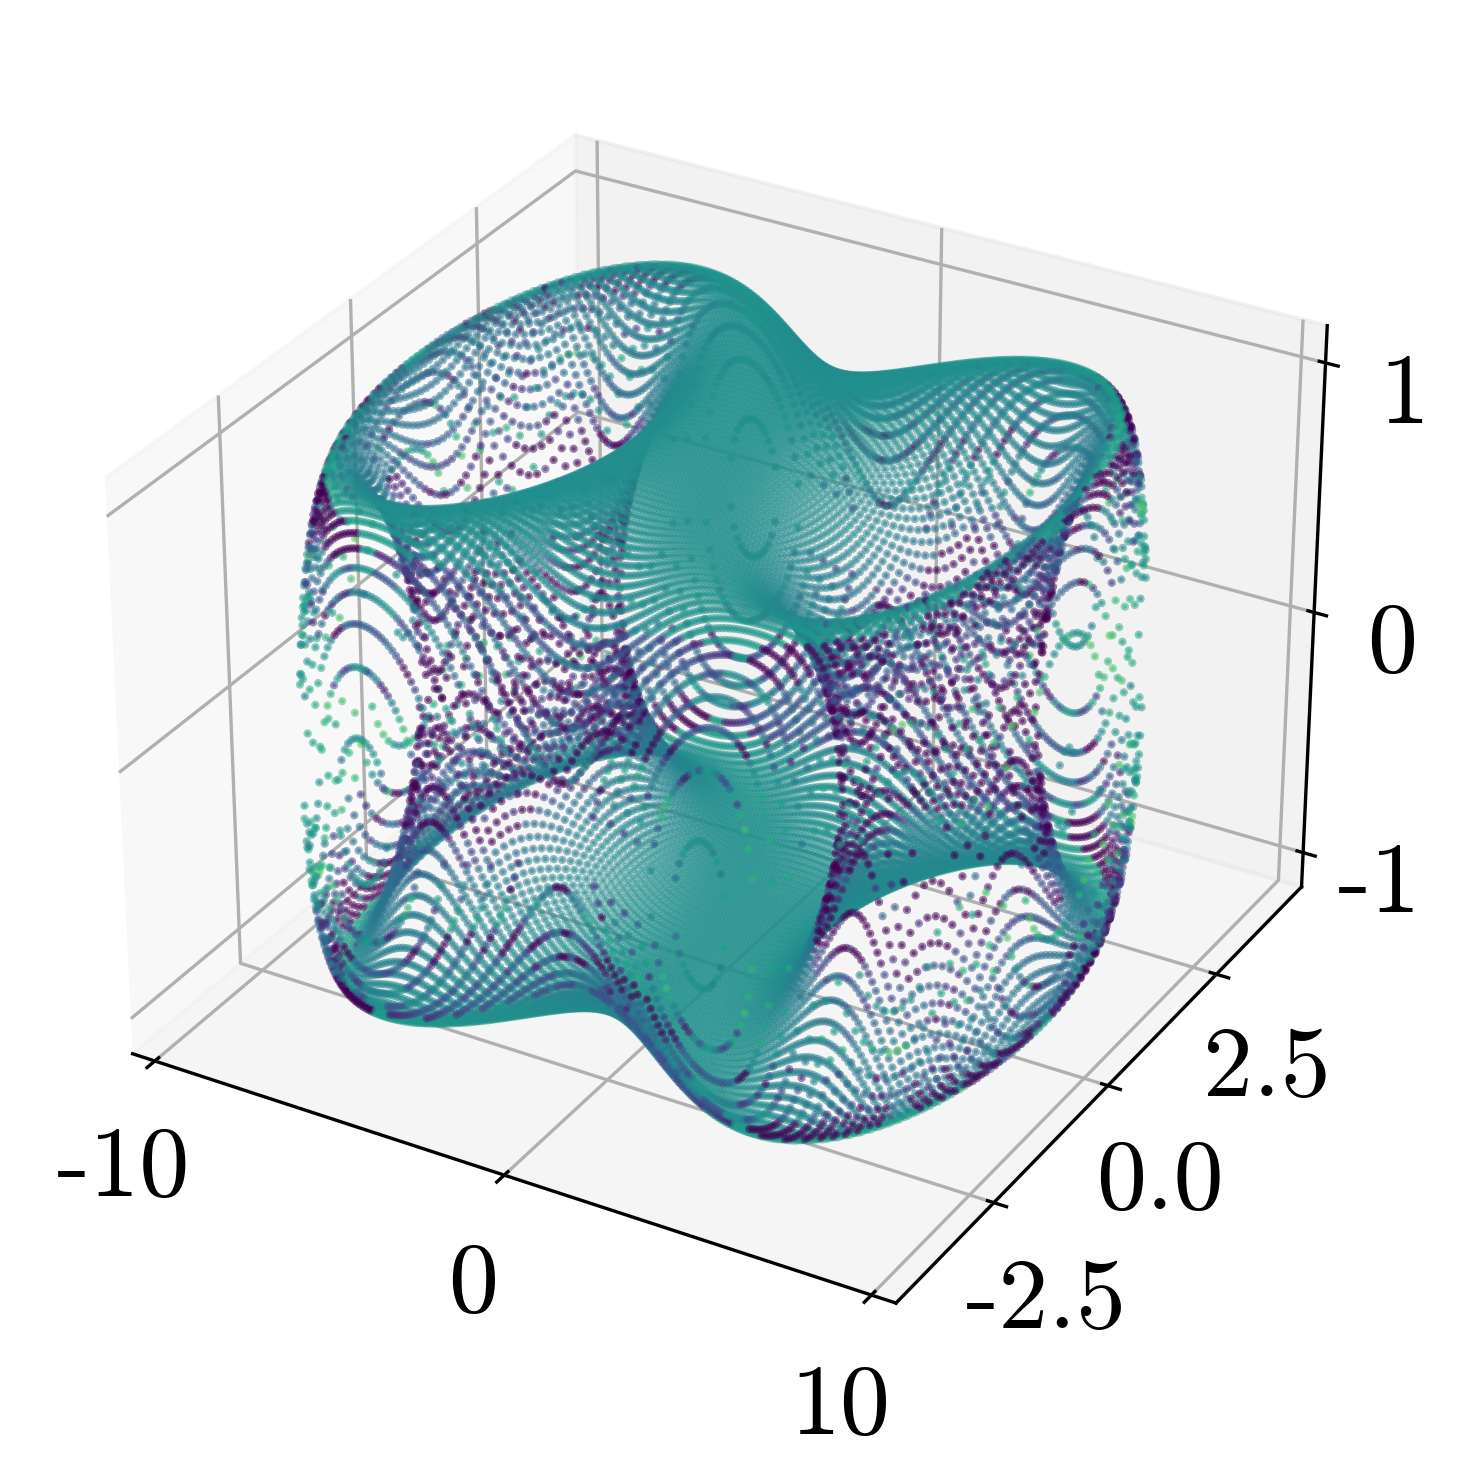

In [23]:
fig, ax = plt.subplots(1, 1, subplot_kw={'projection':'3d'})
#ax.set_box_aspect([2,2,1])
#fig, ax = visualize_grid_torus(30,2,1)
#ax.scatter(data[:,0], data[:, 1], data[:,2], s=1, c=sc, cmap='viridis',zorder=10, alpha=0.5)
ax.scatter(data[:,0], data[:, 1], data[:,2], s=1, c=sc, cmap='viridis',zorder=10,norm = mpl.colors.Normalize(vmin=-.3, vmax=.3, clip=False), alpha=0.5)
#ax.view_init(20, 40)
#ax.view_init(20, 100)


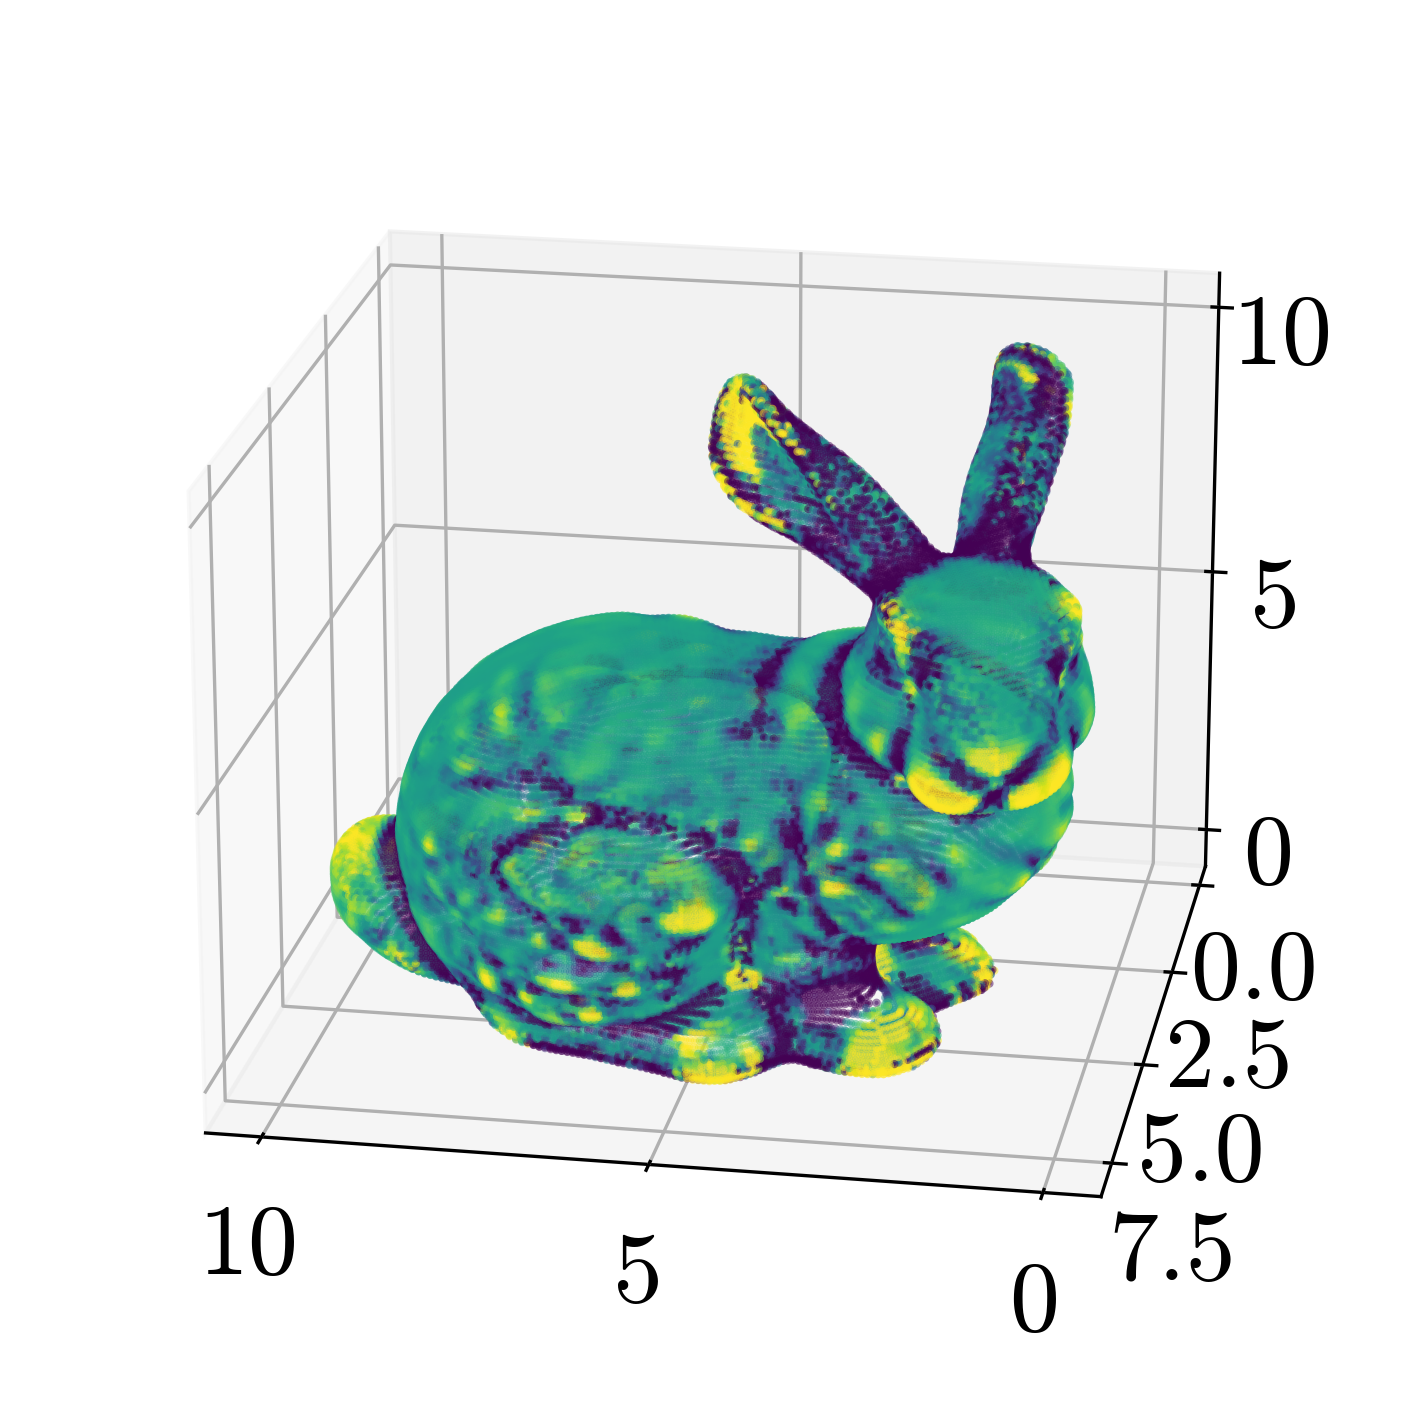

In [185]:
fig, ax = plt.subplots(1, 1, subplot_kw={'projection':'3d'})
#ax.set_box_aspect([2,2,1])
#fig, ax = visualize_grid_torus(30,2,1)
#ax.scatter(data[:,0], data[:, 1], data[:,2], s=1, c=sc, cmap='viridis',zorder=10, alpha=0.5)
ax.scatter(data[:,0], data[:, 2], data[:,1], s=1, c=sc, cmap='viridis',zorder=10,norm = mpl.colors.Normalize(vmin=-1, vmax=.8, clip=False), alpha=0.5)
#ax.view_init(20, 40)
ax.view_init(20, 100)


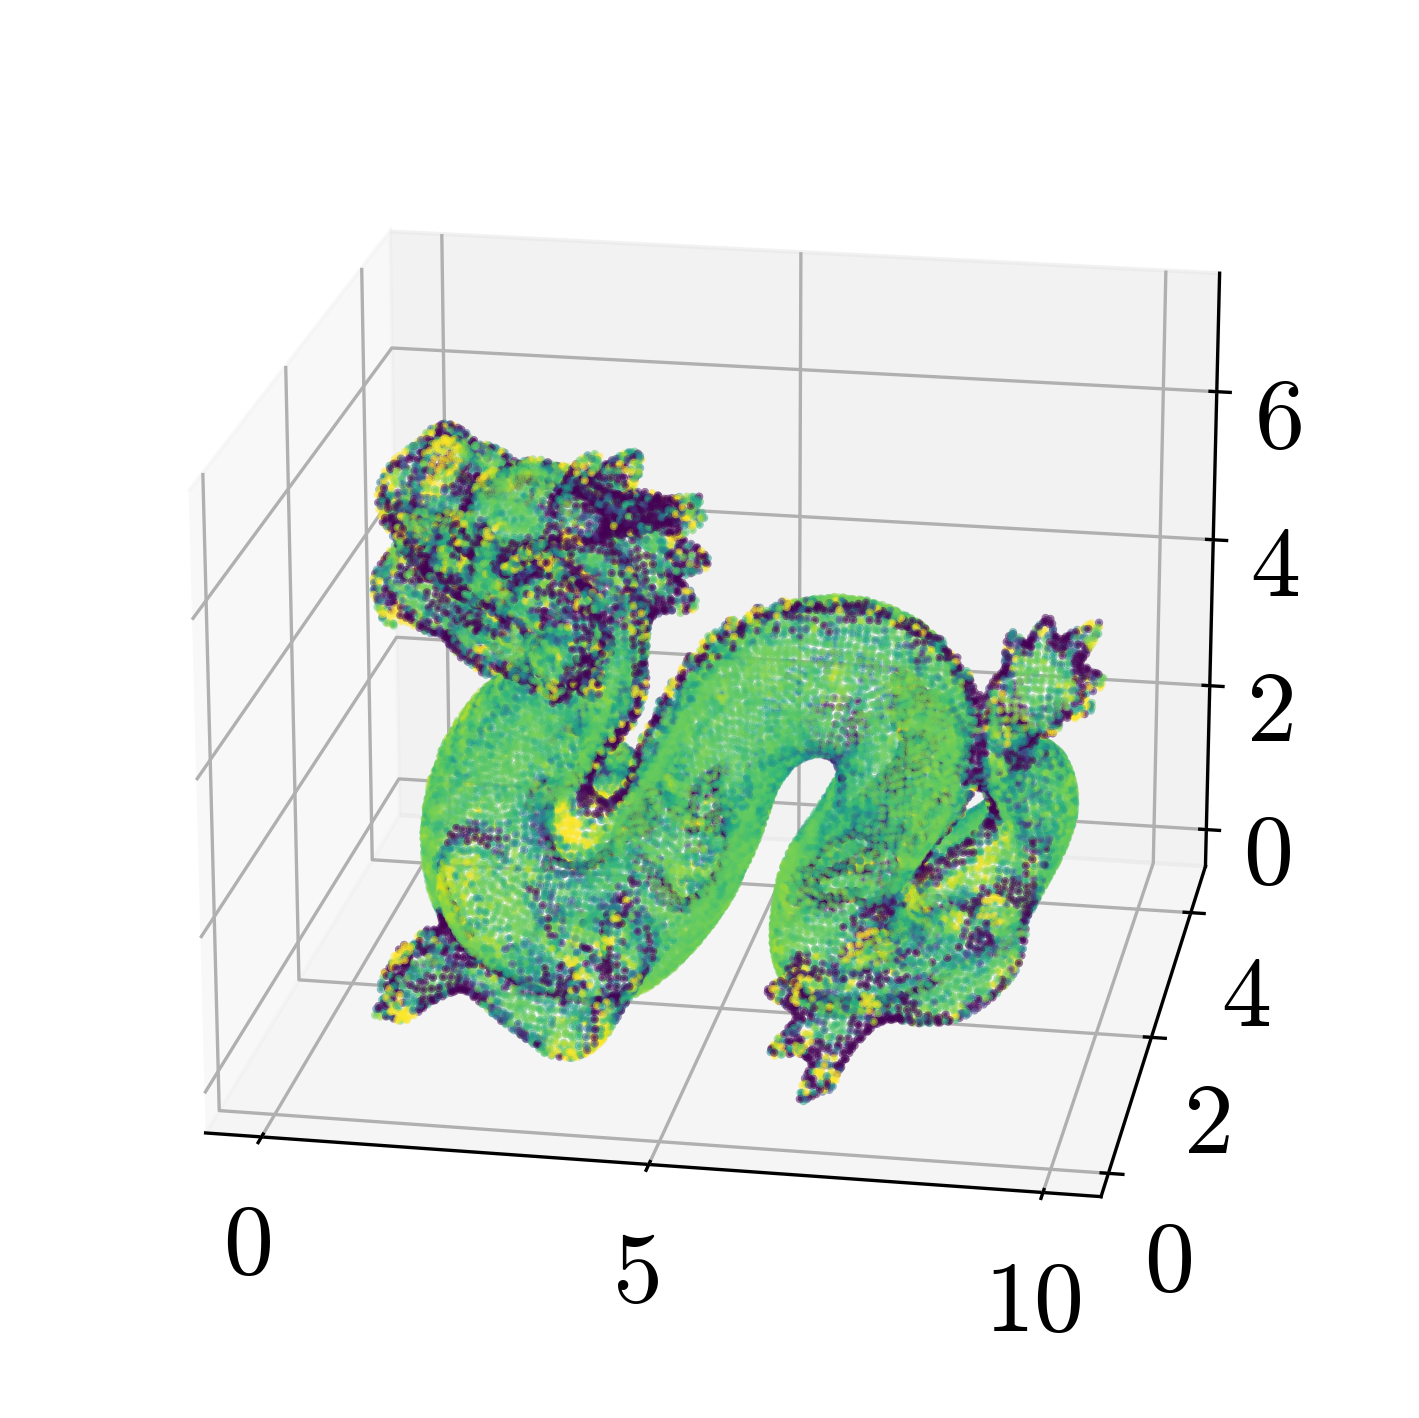

In [171]:
fig, ax = plt.subplots(1, 1, subplot_kw={'projection':'3d'})
#ax.set_box_aspect([2,2,1])
#fig, ax = visualize_grid_torus(30,2,1)
#ax.scatter(data[:,0], data[:, 1], data[:,2], s=1, c=sc, cmap='viridis',zorder=10, alpha=0.5)
ax.scatter(data[:,0], data[:, 1], data[:,2], s=1, c=sc, cmap='viridis',zorder=10,norm = mpl.colors.Normalize(vmin=-5, vmax=1.5, clip=False), alpha=0.5)
#ax.view_init(20, 40)
ax.view_init(20, 280)


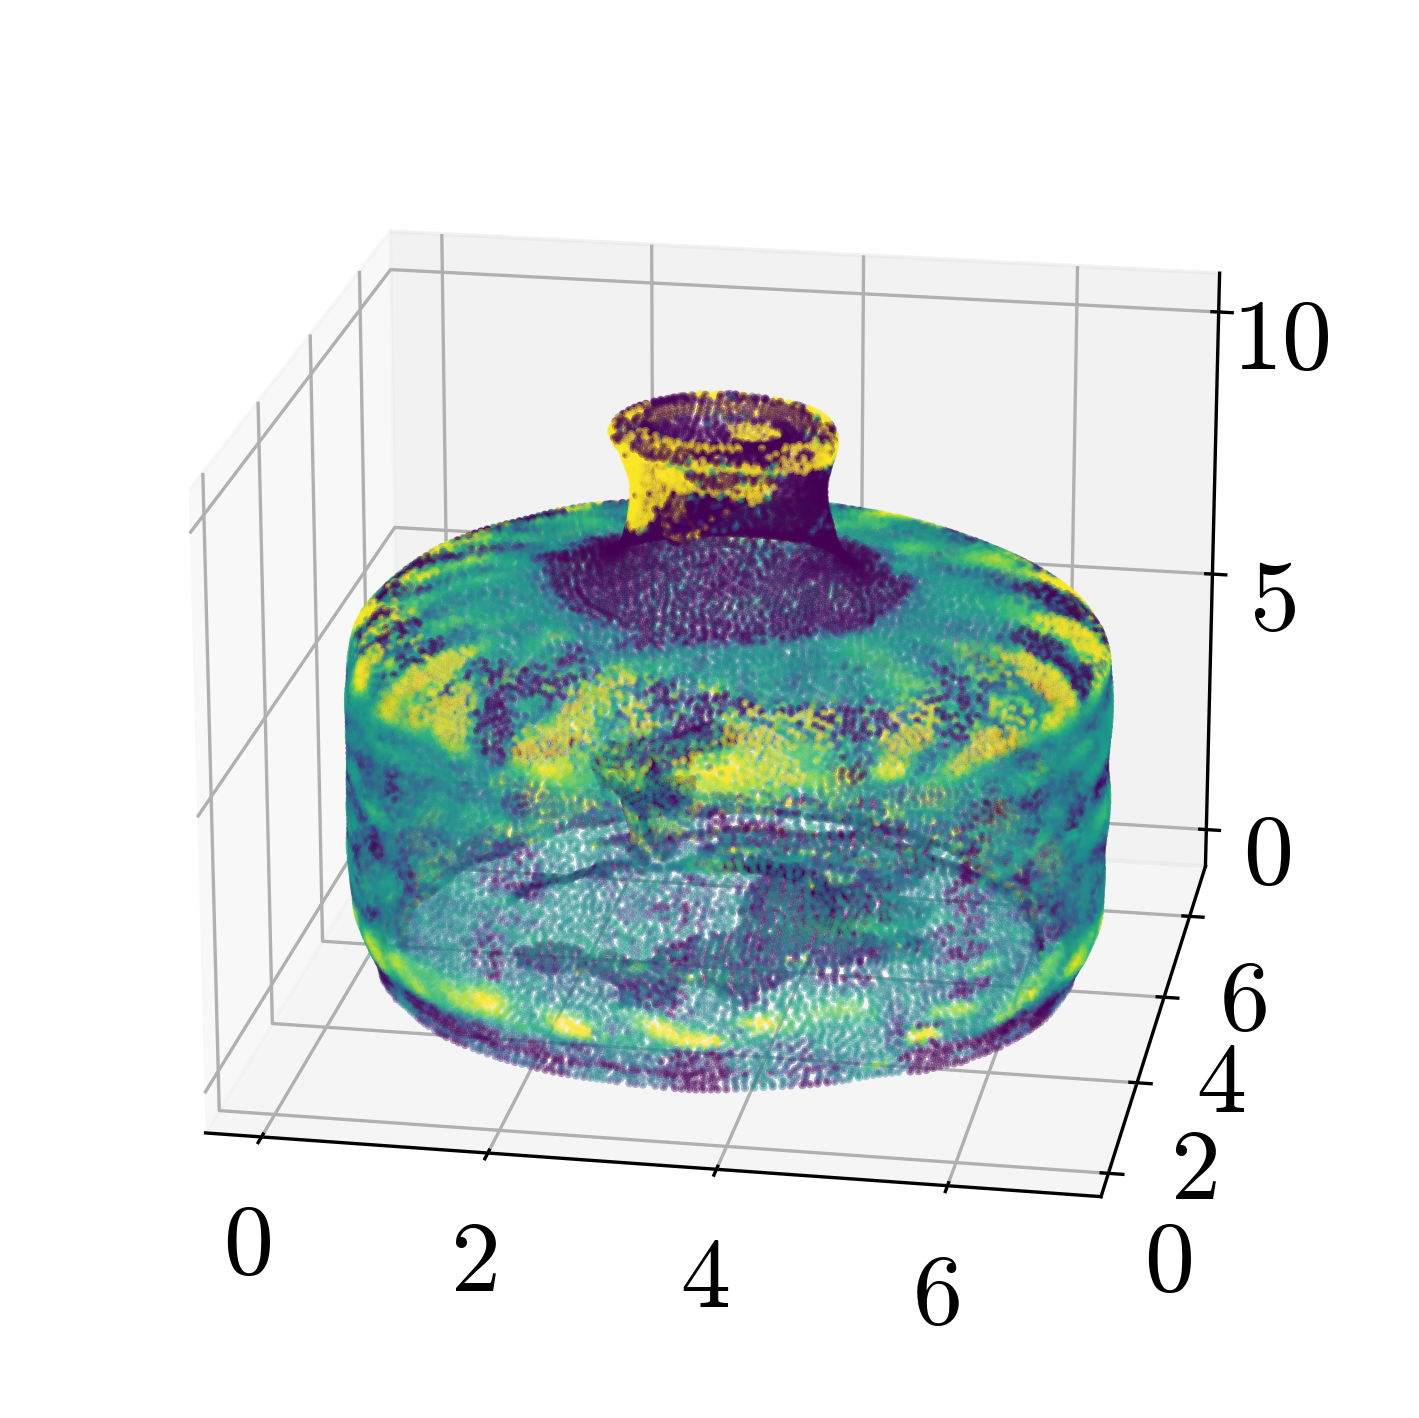

In [162]:
fig, ax = plt.subplots(1, 1, subplot_kw={'projection':'3d'})
#ax.set_box_aspect([1,1,2])
ax.set_aspect('auto')

#fig, ax = visualize_grid_torus(30,2,1)
#ax.scatter(data[:,0], data[:, 1], data[:,2], s=1, c=sc, cmap='viridis',zorder=10, alpha=0.5)
ax.scatter(data[:,0], data[:, 2], data[:,1], s=1, c=sc, cmap='viridis',zorder=10,norm = mpl.colors.Normalize(vmin=-.1, vmax=.1, clip=False), alpha=0.4)
#ax.view_init(20, 40)
ax.view_init(20, 280)

In [32]:
#fig.savefig(f'../figures/scalarcurvature_sphere.png')    
#fig.savefig(f'../figures/scalarcurvature_sphere.pdf')

In [87]:
#fig.savefig(f'../figures/scalarcurvature_ellipsoid.png')    
#fig.savefig(f'../figures/scalarcurvature_ellipsoid.pdf')

In [101]:
#fig.savefig(f'../figures/scalarcurvature_torus.png')    
#fig.savefig(f'../figures/scalarcurvature_torus.pdf')

In [131]:
fig.savefig(f'../figures/scalarcurvature_dragon.png')    
fig.savefig(f'../figures/scalarcurvature_dragon.pdf')

In [163]:
fig.savefig(f'../figures/scalarcurvature_vase.png')    
fig.savefig(f'../figures/scalarcurvature_vase.pdf')

In [187]:
fig.savefig(f'../figures/scalarcurvature_bunny.png')    
fig.savefig(f'../figures/scalarcurvature_bunny.pdf')